In [1]:
import pickle
import pandas as pd
import os
from explainers.dce import DistributionalCounterfactualExplainer
import torch
from utils.visualization import *
from utils.data_processing import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


pd.set_option('display.max_columns', None)

%reload_ext autoreload
%autoreload 2

c:\Users\leiyo\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
DEBUG:root:test


In [3]:
data_path = 'data/cardio'

In [5]:
df_ = pd.read_csv(os.path.join(data_path, 'cardio.csv'), sep=';')
df = df_.copy()

In [6]:
df.sample(5)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc   
29913  42773  15906       1     165    55.0    110     70            1     1  \
9687   13816  19668       1     151    64.0    160    100            1     1   
36453  52069  16122       1     162    56.0    120     75            1     1   
67479  96351  19034       1     162    88.0    120     80            1     1   
55739  79537  19495       2     172    80.0    130     90            1     1   

       smoke  alco  active  cardio  
29913      0     0       1       0  
9687       0     0       1       1  
36453      1     1       0       0  
67479      0     0       1       0  
55739      0     0       1       0

In [7]:
model_spec = 'backup/mlp/'

factual = pd.read_csv(os.path.join(data_path, model_spec+'factual.csv'))
counterfactual = pd.read_csv(os.path.join(data_path, model_spec+'counterfactual.csv'))

DEBUG:matplotlib.texmanager:family: serif, font: Times, info: \usepackage{mathptmx}
DEBUG:matplotlib.texmanager:DejaVu Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: Computer Modern Sans Serif, info: \usepackage{type1ec}
DEBUG:matplotlib.texmanager:Apple Chancery font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Textile font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: \usepackage{chancery}
DEBUG:matplotlib.texmanager:DejaVu Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: monospace, font: Computer Modern Typewriter, info: \usepackage{type1ec}
DEBUG:matplotlib.dviread:Dvi: C:\Users\leiyo\.matplotlib\tex.cache\24\df\24df9d8c3aa6b018d294093be7efe57d.dvi
DEBUG:matplotl

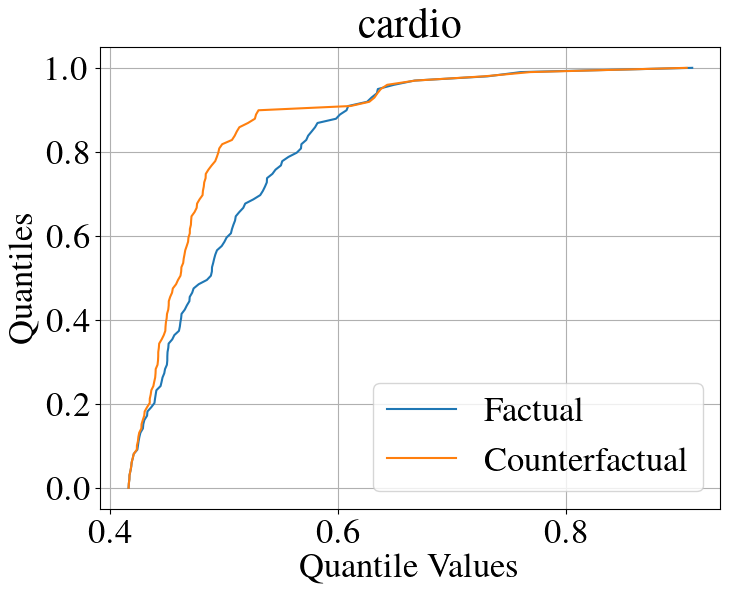

In [20]:
plot_quantile(factual=factual, counterfactual=counterfactual, column_name='cardio');

DEBUG:matplotlib.texmanager:family: serif, font: Times, info: \usepackage{mathptmx}
DEBUG:matplotlib.texmanager:DejaVu Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: Computer Modern Sans Serif, info: \usepackage{type1ec}
DEBUG:matplotlib.texmanager:Apple Chancery font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Textile font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: \usepackage{chancery}
DEBUG:matplotlib.texmanager:DejaVu Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: monospace, font: Computer Modern Typewriter, info: \usepackage{type1ec}
DEBUG:matplotlib.dviread:Dvi: C:\Users\leiyo\.matplotlib\tex.cache\24\df\24df9d8c3aa6b018d294093be7efe57d.dvi
DEBUG:matplotl

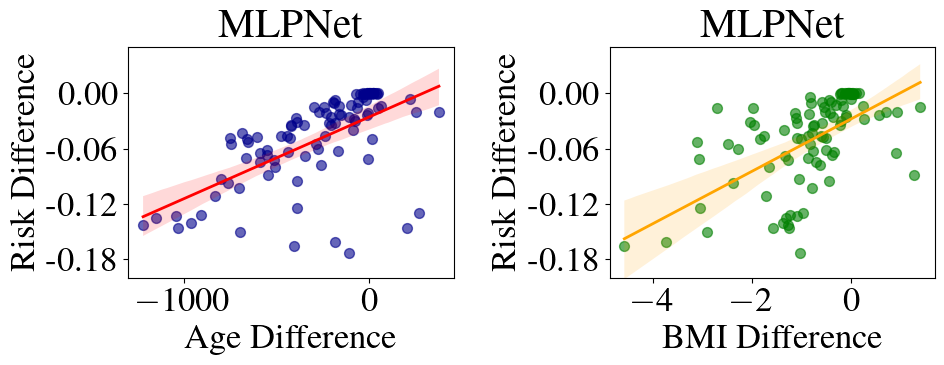

In [27]:
factual['bmi'] = factual['weight'] / (factual['height'] * factual['height'] / 1e4)
counterfactual['bmi'] = counterfactual['weight'] / (counterfactual['height'] * counterfactual['height'] / 1e4)

counterfactual['cardio_diff'] = counterfactual['cardio'] - factual['cardio'] 
counterfactual['age_diff'] = counterfactual['age'] - factual['age'] 
counterfactual['weight_diff'] = counterfactual['weight'] - factual['weight'] 
counterfactual['height_diff'] = counterfactual['height'] - factual['height'] 
counterfactual['bmi_diff'] = counterfactual['bmi'] - factual['bmi']


fontsize = 25

# Enable LaTeX text rendering in Matplotlib
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{times}",  # Ensure you use the times package
    "font.family": "serif",
    "font.serif": ["Times", "Times New Roman"],  # This should use Times font
    "font.size": fontsize
})

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4.2))

# Create the individual plots with enhanced aesthetics
sns.regplot(x='age_diff', y='cardio_diff', data=counterfactual, ax=axes[0], fit_reg=True, 
            scatter_kws={"color": "darkblue", "alpha": 0.6, "s": 50}, line_kws={"color": "red", "lw": 2}
            )
sns.regplot(x='weight_diff', y='cardio_diff', data=counterfactual, ax=axes[1], fit_reg=True, 
            scatter_kws={"color": "green", "alpha": 0.6, "s": 50}, line_kws={"color": "orange", "lw": 2}
            )


# Set titles and labels with enhanced fonts
for i, ax in enumerate(axes):
    ax.set_title('MLPNet')
    ax.set_xlabel(ax.get_xlabel())
    ax.set_ylabel(ax.get_ylabel())
    ax.tick_params()
    ax.set_ylim(-0.20, 0.05)

# Custom titles and labels
axes[0].set_xlabel('Age Difference')
axes[1].set_xlabel('BMI Difference')
axes[0].set_ylabel('Risk Difference')
axes[1].set_ylabel('Risk Difference')


from matplotlib.ticker import  MaxNLocator, FormatStrFormatter

# axes[0].xaxis.set_major_locator(MaxNLocator(3, min_n_ticks=3))  
axes[1].xaxis.set_major_locator(MaxNLocator(3, min_n_ticks=3)) 
axes[0].yaxis.set_major_locator(MaxNLocator(4, min_n_ticks=4))  
axes[1].yaxis.set_major_locator(MaxNLocator(4, min_n_ticks=4)) 

# Use FormatStrFormatter for y-ticks
formatter = FormatStrFormatter('%.2f')
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)


# Adjust the layout
plt.tight_layout()

fig.savefig('pictures/mlp_age_weight.pdf', format='pdf', bbox_inches='tight')


# Show the plot
plt.show()



In [12]:
with open(os.path.join(data_path, 'mlp', 'explainer.pkl'), 'rb') as file:
    explainer_mlp = pickle.load(file)

with open(os.path.join(data_path, 'svm', 'explainer.pkl'), 'rb') as file:
    explainer_svm = pickle.load(file)

with open(os.path.join(data_path, 'rbf', 'explainer.pkl'), 'rb') as file:
    explainer_rbf = pickle.load(file)

In [25]:
explainer_mlp.found_feasible_solution, explainer_svm.found_feasible_solution, explainer_rbf.found_feasible_solution

(True, False, False)

In [41]:
# # Sort the arrays

# sample_num = len(explainer_mlp.y_prime)

# y_target = torch.distributions.beta.Beta(0.5, 0.9).sample((sample_num,))
# y_true = df['cardio'].sample(sample_num)
# y_mlp = explainer_mlp.y
# y_svm = explainer_svm.y
# y_rbf = explainer_rbf.y


# y_target_sorted = np.sort(y_target.numpy())
# y_true_sorted = np.sort(y_true)
# y_mlp_sorted = np.sort(y_mlp.squeeze().detach().numpy())
# y_svm_sorted = np.sort(y_svm.squeeze().detach().numpy())
# y_rbf_sorted = np.sort(y_rbf.squeeze().detach().numpy())


# # Generate quantiles
# quantiles = np.linspace(0, 1, sample_num)

# # Plotting
# plt.figure(figsize=(6, 5))
# plt.plot(quantiles, y_target_sorted, label='y_target', color='red')
# plt.plot(quantiles, y_true_sorted, label='y_true', color='black')
# plt.plot(quantiles, y_mlp_sorted, label='y_mlp', color='blue')
# plt.plot(quantiles, y_svm_sorted, label='y_svm', color='green')
# plt.plot(quantiles, y_rbf_sorted, label='y_rbf', color='yellow')


# plt.title('Quantile Function')
# plt.xlabel('Quantiles')
# plt.ylabel('Values')
# plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.grid(True)
# plt.show()

In [4]:
factual_mlp = pd.read_csv(os.path.join(data_path, 'mlp/'+'factual.csv'))
counterfactual_mlp = pd.read_csv(os.path.join(data_path, 'mlp/'+'counterfactual.csv'))

factual_svm = pd.read_csv(os.path.join(data_path, 'svm/'+'factual.csv'))
counterfactual_svm= pd.read_csv(os.path.join(data_path, 'svm/'+'counterfactual.csv'))

factual_rbf = pd.read_csv(os.path.join(data_path, 'rbf/'+'factual.csv'))
counterfactual_rbf= pd.read_csv(os.path.join(data_path, 'rbf/'+'counterfactual.csv'))

factual_joined = pd.concat([factual_mlp, factual_svm])

DEBUG:matplotlib.texmanager:family: serif, font: Times, info: \usepackage{mathptmx}
DEBUG:matplotlib.texmanager:DejaVu Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: Computer Modern Sans Serif, info: \usepackage{type1ec}
DEBUG:matplotlib.texmanager:Apple Chancery font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Textile font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: \usepackage{chancery}
DEBUG:matplotlib.texmanager:DejaVu Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: monospace, font: Computer Modern Typewriter, info: \usepackage{type1ec}
DEBUG:matplotlib.dviread:Dvi: C:\Users\leiyo\.matplotlib\tex.cache\24\df\24df9d8c3aa6b018d294093be7efe57d.dvi
DEBUG:matplotl

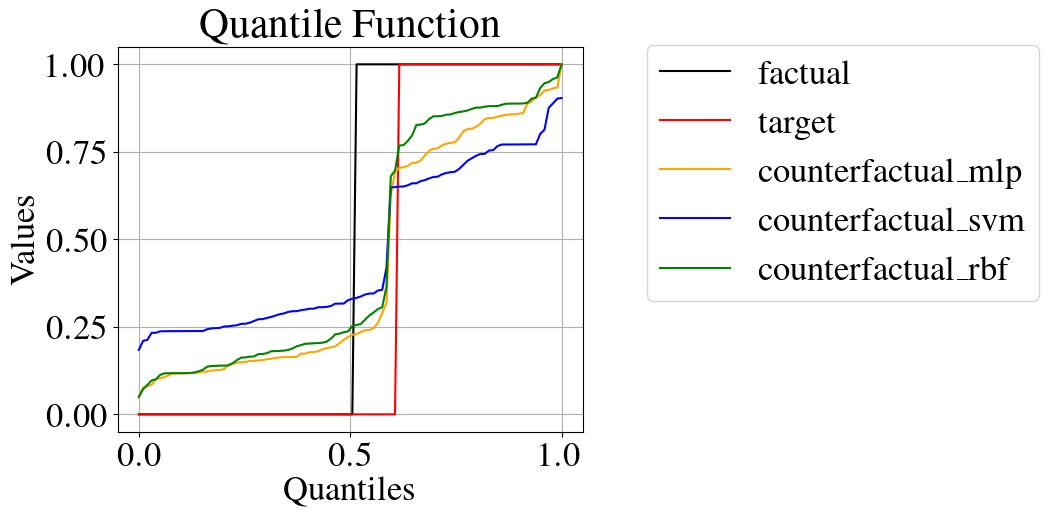

In [67]:
# Generate quantiles
quantiles = np.linspace(0, 1, 100)


y_factual = np.sort(np.array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.]))

y_target = np.sort(np.array([0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0.]))

y_mlp_cf = np.sort(counterfactual_mlp['cardio'].values)
y_svm_cf = np.sort(counterfactual_svm['cardio'].values)
y_rbf_cf = np.sort(counterfactual_rbf['cardio'].values)

# Plotting
plt.figure(figsize=(6, 5))
plt.plot(quantiles, y_factual, label='factual', color='black')
plt.plot(quantiles, y_target, label='target', color='red')
plt.plot(quantiles, y_mlp_cf, label='counterfactual_mlp', color='orange')
plt.plot(quantiles, y_svm_cf, label='counterfactual_svm', color='blue')
plt.plot(quantiles, y_rbf_cf, label='counterfactual_rbf', color='green')

plt.title('Quantile Function')
plt.xlabel('Quantiles')
plt.ylabel('Values')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid(True)
plt.show()

In [79]:
s_counterfactual = ""
for k, v in enumerate(y_rbf_cf):
    s_counterfactual += f" ({np.round(k*0.01,6)},{np.round(v,6)})"

print(s_counterfactual)

 (0.0,0.05007) (0.01,0.071719) (0.02,0.083807) (0.03,0.096894) (0.04,0.100011) (0.05,0.112778) (0.06,0.117262) (0.07,0.117496) (0.08,0.117498) (0.09,0.117505) (0.1,0.11755) (0.11,0.117557) (0.12,0.118172) (0.13,0.119554) (0.14,0.123147) (0.15,0.127119) (0.16,0.136288) (0.17,0.138016) (0.18,0.138448) (0.19,0.13918) (0.2,0.139212) (0.21,0.139796) (0.22,0.146326) (0.23,0.155174) (0.24,0.162262) (0.25,0.162657) (0.26,0.164757) (0.27,0.165423) (0.28,0.172139) (0.29,0.172433) (0.3,0.174703) (0.31,0.180177) (0.32,0.180924) (0.33,0.181253) (0.34,0.182075) (0.35,0.184099) (0.36,0.188346) (0.37,0.194468) (0.38,0.19783) (0.39,0.201754) (0.4,0.202211) (0.41,0.203184) (0.42,0.20367) (0.43,0.204545) (0.44,0.207768) (0.45,0.216469) (0.46,0.228624) (0.47,0.23067) (0.48,0.234557) (0.49,0.237039) (0.5,0.252618) (0.51,0.255269) (0.52,0.258358) (0.53,0.270614) (0.54,0.282552) (0.55,0.291063) (0.56,0.300976) (0.57,0.305788) (0.58,0.364877) (0.59,0.679752) (0.6,0.696714) (0.61,0.767996) (0.62,0.769294) (0.6

In [44]:
factual['cardio'].mean()

0.48612825549999994

In [45]:
counterfactual['cardio'].mean()

0.45194948100000004

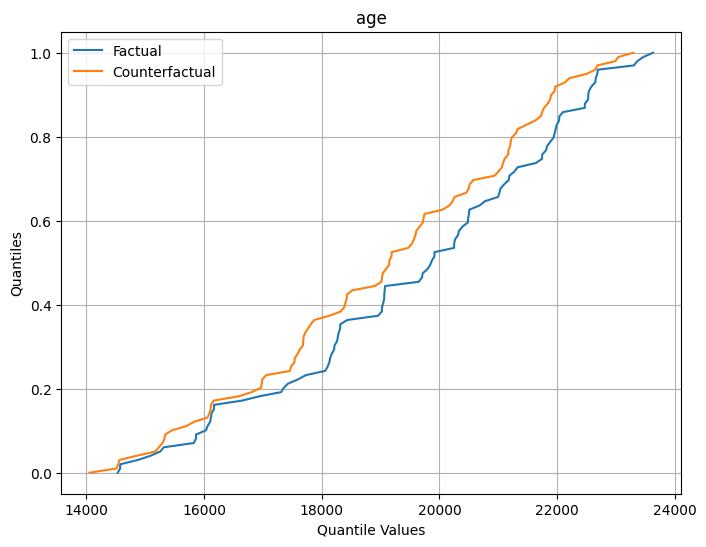

In [10]:
plot_quantile(factual=factual, counterfactual=counterfactual, column_name='age');

In [11]:
factual['cardio'].mean(), counterfactual['cardio'].mean()

(0.49684339164999997, 0.44560348330000005)

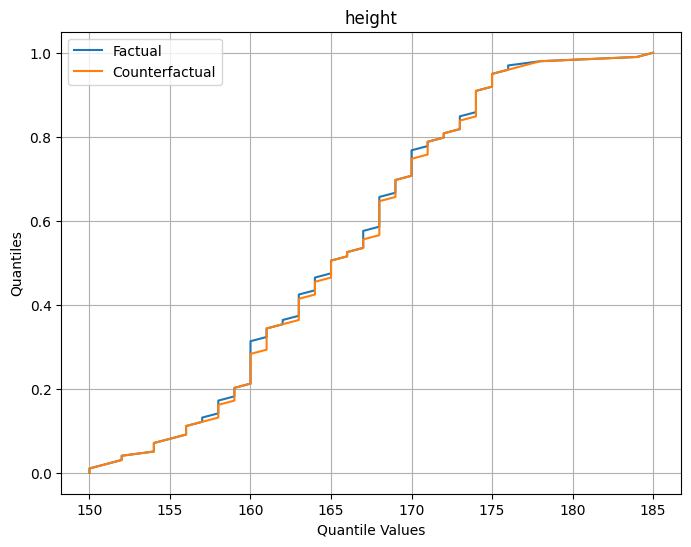

In [12]:
plot_quantile(factual=factual, counterfactual=counterfactual, column_name='height');

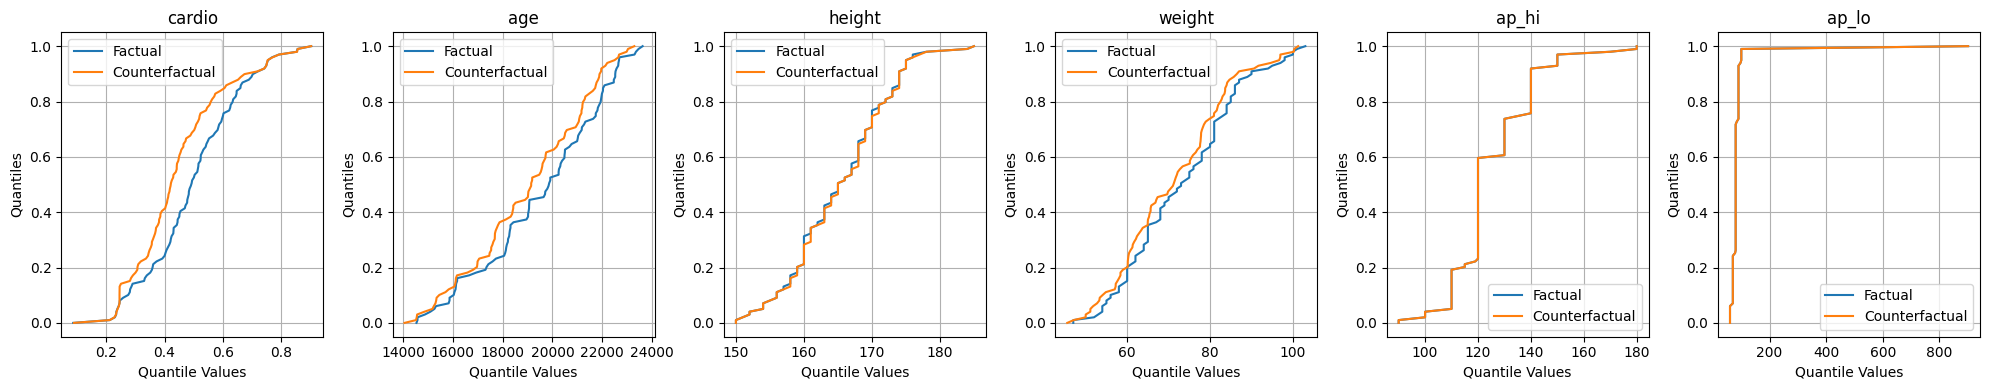

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname

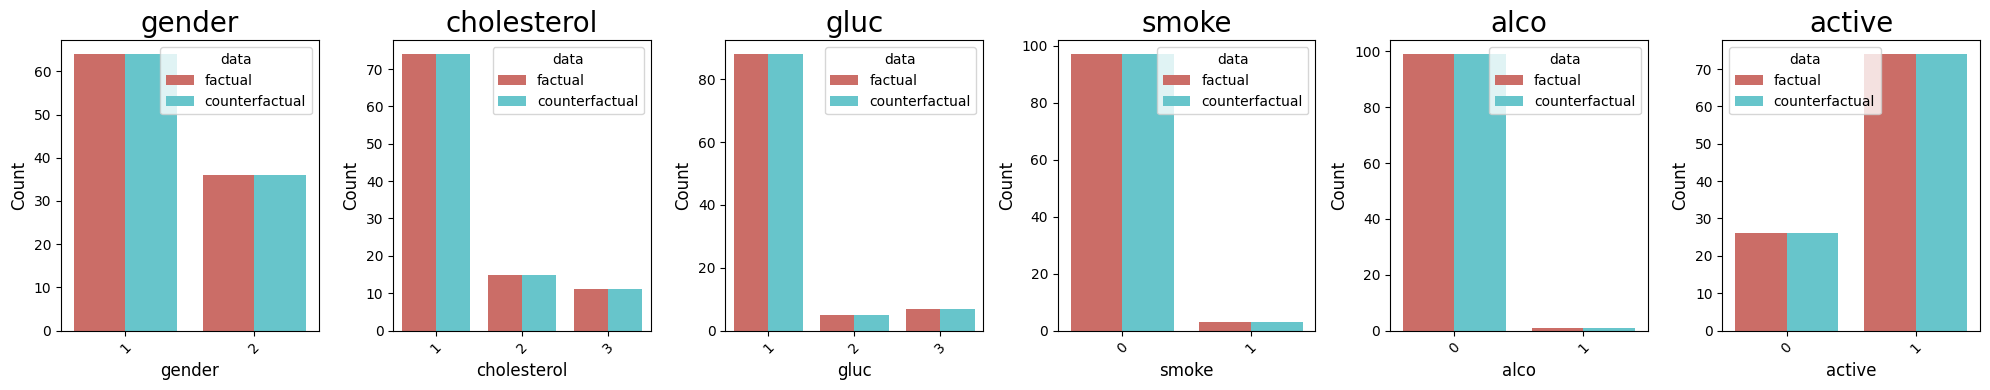

In [13]:
factual['data'] = 'factual'
counterfactual['data'] = 'counterfactual'

fcf = pd.concat([factual, counterfactual])

def plot_quantile_ax(factual, counterfactual, column_name):
    quantiles_factual = factual[column_name].quantile(np.linspace(0, 1, 100))
    quantiles_counterfactual = counterfactual[column_name].quantile(np.linspace(0, 1, 100))

    # Plot quantiles
    plt.plot(quantiles_factual.values, np.linspace(0, 1, 100), label="Factual")
    plt.plot(quantiles_counterfactual.values, np.linspace(0, 1, 100), label="Counterfactual")
    plt.xlabel("Quantile Values")
    plt.ylabel("Quantiles")
    plt.title(f"{column_name}")
    plt.legend()
    plt.grid(True)

# Assuming factual and counterfactual are pandas DataFrames with the same columns
columns = ['cardio', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Create a 3x4 subplot layout
plt.figure(figsize=(20, 4))
for i, column in enumerate(columns):
    plt.subplot(1, len(columns), i+1)
    plot_quantile_ax(factual, counterfactual, column)

plt.tight_layout()
plt.show()

columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

def hist_plot_ax(df, x, hue, title, ax):
    g = sns.countplot(x=x, hue=hue, data=df.sort_values(by=x), palette="hls", ax=ax)
    g.set_xticklabels(g.get_xticklabels(), rotation=45)
    g.set_xlabel(x, fontsize=12)
    g.set_ylabel("Count", fontsize=12)
    g.set_title(title, fontsize=20)

fcf = pd.concat([factual, counterfactual])

# Create a 3x4 subplot layout
plt.figure(figsize=(20, 4))
for i, column in enumerate(columns):
    ax = plt.subplot(1, len(columns), i+1)
    hist_plot_ax(fcf, column, 'data', column, ax)

plt.tight_layout()
plt.show()

In [14]:
column_name = 'cardio'
quantiles_factual = factual[column_name].quantile(np.linspace(0, 1, 100))
quantiles_counterfactual = counterfactual[column_name].quantile(np.linspace(0, 1, 100))

In [15]:
s_factual = ""
for k, v in quantiles_factual.to_dict().items():
    s_factual += f" ({np.round(v,6)},{np.round(k,6)})"
print(s_factual)

 (0.085741,0.0) (0.211304,0.010101) (0.229093,0.020202) (0.23359,0.030303) (0.234254,0.040404) (0.237848,0.050505) (0.242106,0.060606) (0.245005,0.070707) (0.24626,0.080808) (0.257768,0.090909) (0.275138,0.10101) (0.280555,0.111111) (0.281676,0.121212) (0.286238,0.131313) (0.290111,0.141414) (0.329731,0.151515) (0.332323,0.161616) (0.339071,0.171717) (0.351025,0.181818) (0.356634,0.191919) (0.359183,0.20202) (0.361064,0.212121) (0.372669,0.222222) (0.392326,0.232323) (0.400236,0.242424) (0.403241,0.252525) (0.40664,0.262626) (0.411471,0.272727) (0.416497,0.282828) (0.420178,0.292929) (0.421737,0.30303) (0.424218,0.313131) (0.43013,0.323232) (0.430919,0.333333) (0.431427,0.343434) (0.442166,0.353535) (0.44472,0.363636) (0.445196,0.373737) (0.450853,0.383838) (0.451485,0.393939) (0.454799,0.40404) (0.469723,0.414141) (0.472183,0.424242) (0.477727,0.434343) (0.478282,0.444444) (0.480718,0.454545) (0.483344,0.464646) (0.483808,0.474747) (0.486158,0.484848) (0.490383,0.494949) (0.493338,0.5

In [16]:
s_counterfactual = ""
for k, v in quantiles_counterfactual.to_dict().items():
    s_counterfactual += f" ({np.round(v,6)},{np.round(k,6)})"
print(s_counterfactual)

 (0.088299,0.0) (0.211631,0.010101) (0.227734,0.020202) (0.233042,0.030303) (0.234917,0.040404) (0.238565,0.050505) (0.242856,0.060606) (0.245086,0.070707) (0.245135,0.080808) (0.245138,0.090909) (0.245147,0.10101) (0.245255,0.111111) (0.245412,0.121212) (0.245524,0.131313) (0.250125,0.141414) (0.280946,0.151515) (0.284634,0.161616) (0.291144,0.171717) (0.300311,0.181818) (0.306435,0.191919) (0.306941,0.20202) (0.309715,0.212121) (0.31852,0.222222) (0.336054,0.232323) (0.343126,0.242424) (0.345284,0.252525) (0.348283,0.262626) (0.352762,0.272727) (0.356034,0.282828) (0.356627,0.292929) (0.36056,0.30303) (0.364046,0.313131) (0.367512,0.323232) (0.369708,0.333333) (0.37087,0.343434) (0.377148,0.353535) (0.380946,0.363636) (0.381484,0.373737) (0.385455,0.383838) (0.385929,0.393939) (0.39075,0.40404) (0.402238,0.414141) (0.404945,0.424242) (0.408372,0.434343) (0.409861,0.444444) (0.412511,0.454545) (0.413662,0.464646) (0.416984,0.474747) (0.418319,0.484848) (0.420693,0.494949) (0.4221,0.50

In [20]:
column_name = 'smoke'
pd.concat(
    [
        pd.DataFrame(factual.groupby(column_name)['cardio'].mean()).rename({'cardio': 'cardio_factual'}, axis=1),
        pd.DataFrame(counterfactual.groupby(column_name)['cardio'].mean()).rename({'cardio': 'cardio_counterfactual'}, axis=1)
    ],
    axis=1,
)

cardio_factual  cardio_counterfactual
smoke                                       
0            0.497318               0.446171
1            0.481485               0.427243

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000002146CABFF70>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000002146C622670>


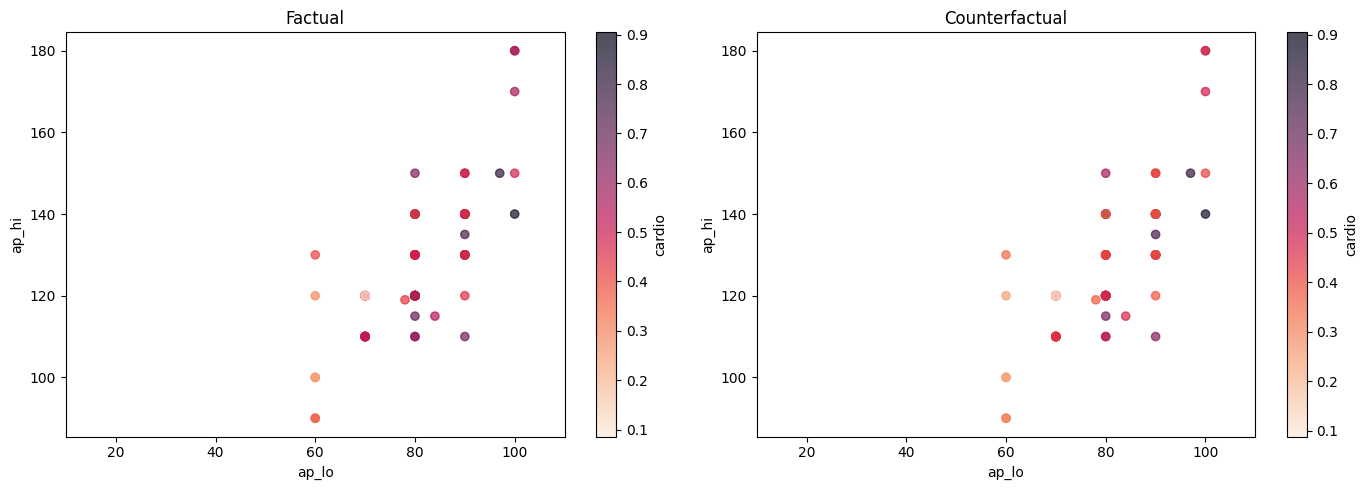

In [23]:
def colorful_scatter(df, x, y, color_col, title, ax):
    scatter = ax.scatter(df[x], df[y], alpha=0.7, c=df[color_col], cmap='rocket_r')

    # Adding colorbar to show the scale
    plt.colorbar(scatter, ax=ax, label=color_col)

    # Adding labels and title
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)

    ax.set_xlim(10,110)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # Create 1 row, 2 columns of subplots

# Assuming 'df' is your DataFrame and it already contains the columns 'Credit amount', 'Duration', and 'Risk'
# Call the function with the respective axes object
colorful_scatter(factual, 'ap_lo', 'ap_hi', 'cardio', 'Factual', ax1)
colorful_scatter(counterfactual, 'ap_lo', 'ap_hi', 'cardio', 'Counterfactual', ax2)

plt.tight_layout()  # Adjust the layout
plt.show()

In [9]:
factual_mlp = pd.read_csv(os.path.join(data_path, 'mlp/U_040/'+'factual.csv'))
counterfactual_mlp_005 = pd.read_csv(os.path.join(data_path, 'mlp/U_005/'+'counterfactual.csv'))
counterfactual_mlp_010 = pd.read_csv(os.path.join(data_path, 'mlp/U_010/'+'counterfactual.csv'))
counterfactual_mlp_020 = pd.read_csv(os.path.join(data_path, 'mlp/U_020/'+'counterfactual.csv'))
counterfactual_mlp_040 = pd.read_csv(os.path.join(data_path, 'mlp/U_040/'+'counterfactual.csv'))

DEBUG:matplotlib.texmanager:family: serif, font: Times, info: \usepackage{mathptmx}
DEBUG:matplotlib.texmanager:DejaVu Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: Computer Modern Sans Serif, info: \usepackage{type1ec}
DEBUG:matplotlib.texmanager:Apple Chancery font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Textile font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: \usepackage{chancery}
DEBUG:matplotlib.texmanager:DejaVu Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: monospace, font: Computer Modern Typewriter, info: \usepackage{type1ec}
DEBUG:matplotlib.dviread:Dvi: C:\Users\leiyo\.matplotlib\tex.cache\24\df\24df9d8c3aa6b018d294093be7efe57d.dvi
DEBUG:matplotl

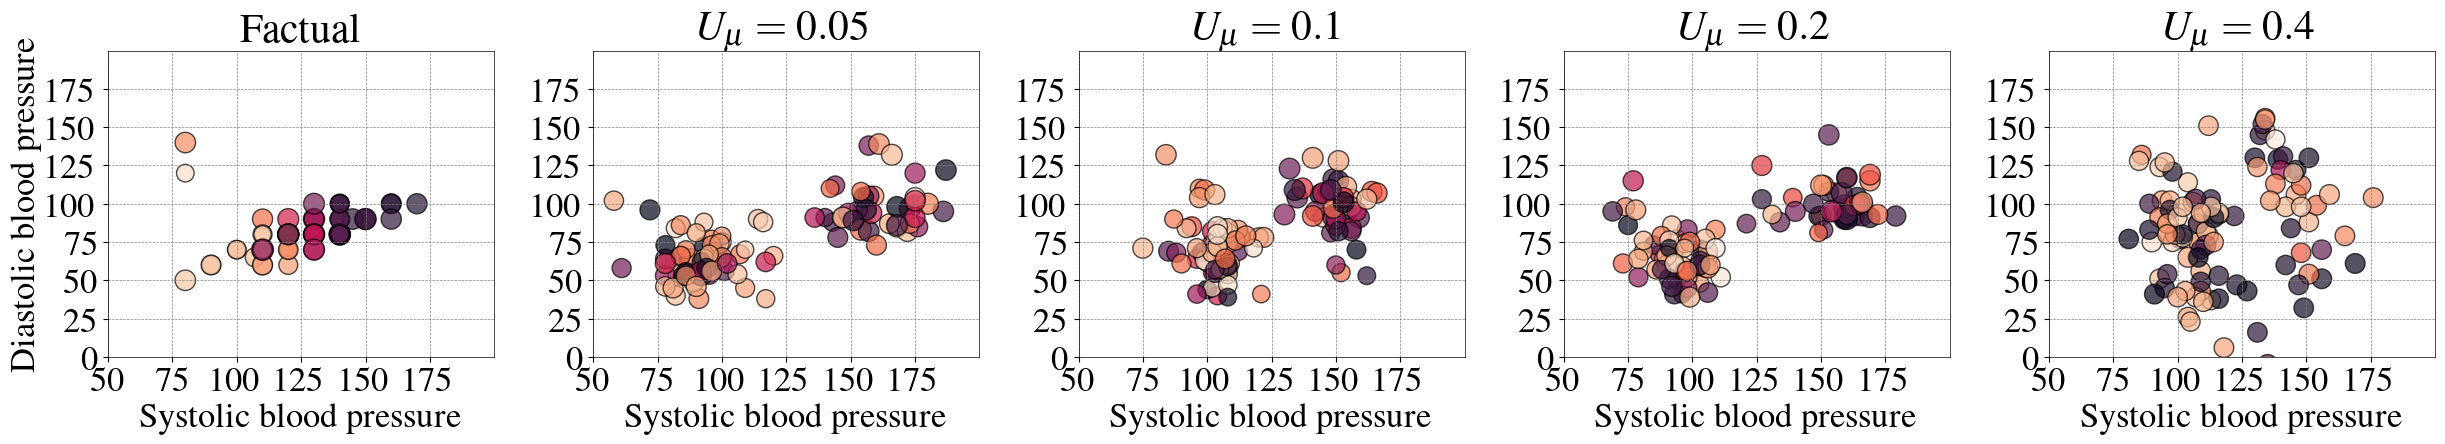

In [10]:
fontsize = 25

# Enable LaTeX text rendering in Matplotlib
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{times}",  # Ensure you use the times package
    "font.family": "serif",
    "font.serif": ["Times", "Times New Roman"],  # This should use Times font
    "font.size": fontsize
})

def colorful_scatter_with_sizing(df, x, y, size_col, color_col, title, ax, show_colorbar=True, cbar_ax=None, ylabel=False):
    scatter = ax.scatter(df[x], df[y], s=df[size_col]*0.01, alpha=0.7, c=df[color_col], cmap='rocket_r', edgecolor='black')

    # Adding colorbar conditionally
    if show_colorbar and cbar_ax is not None:
        cbar = plt.colorbar(scatter, cax=cbar_ax, label=color_col)
        cbar.ax.tick_params(labelsize=fontsize)  # Adjust for LaTeX

    # Adding labels and title
    ax.set_xlabel('Systolic blood pressure')
    if ylabel:
        ax.set_ylabel('Diastolic blood pressure')
    ax.set_title(title)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

    # Set grid interval
    ax.set_xticks(np.arange(50, 200, 25))  # Set x grid interval\
    ax.set_xlim(50, 200)

    ax.set_yticks(np.arange(0, 200, 25))  # Set y grid interval
    ax.set_ylim(0, 200)
    

    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Grid lines like TikZ
    ax.set_facecolor('white')  # White background like TikZ

    # Make sure the spines (frame) are visible
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(0.5)

# Create a GridSpec with 2 columns with the second column being slightly narrower for the colorbar
fig = plt.figure(figsize=(25, 5))
gs = GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 1])

# Create the two subplots and the colorbar axis
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])
ax5 = fig.add_subplot(gs[4])
# cbar_ax = fig.add_subplot(gs[5])

# Call the function with the axes object
colorful_scatter_with_sizing(factual_mlp, 'ap_hi', 'ap_lo', 'age', 'cardio', 'Factual', ax1, show_colorbar=False, ylabel=True)
colorful_scatter_with_sizing(counterfactual_mlp_005, 'ap_hi', 'ap_lo', 'age', 'cardio', '$U_{\mu}=0.05$', ax2, show_colorbar=False)
colorful_scatter_with_sizing(counterfactual_mlp_010, 'ap_hi', 'ap_lo', 'age', 'cardio', '$U_{\mu}=0.1$', ax3, show_colorbar=False)
colorful_scatter_with_sizing(counterfactual_mlp_020, 'ap_hi', 'ap_lo', 'age', 'cardio', '$U_{\mu}=0.2$', ax4, show_colorbar=False)
colorful_scatter_with_sizing(counterfactual_mlp_040, 'ap_hi', 'ap_lo', 'age', 'cardio', '$U_{\mu}=0.4$', ax5, show_colorbar=False)

# Adjust the layout so there's no extra space
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('pictures/mlp_model_scatter.pdf', format='pdf', bbox_inches='tight')

# Display the plot
plt.show()

# Make sure to close the figure after saving to avoid memory issues
plt.close(fig)



In [12]:
with open(os.path.join(data_path, 'mlp/U_005', 'explainer.pkl'), 'rb') as file:
    explainer_mlp_005 = pickle.load(file)

with open(os.path.join(data_path, 'mlp/U_010', 'explainer.pkl'), 'rb') as file:
    explainer_mlp_010 = pickle.load(file)

with open(os.path.join(data_path, 'mlp/U_020', 'explainer.pkl'), 'rb') as file:
    explainer_mlp_020 = pickle.load(file)

with open(os.path.join(data_path, 'mlp/U_040', 'explainer.pkl'), 'rb') as file:
    explainer_mlp_040 = pickle.load(file)

DEBUG:matplotlib.texmanager:family: serif, font: Times, info: \usepackage{mathptmx}
DEBUG:matplotlib.texmanager:DejaVu Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: Computer Modern Sans Serif, info: \usepackage{type1ec}
DEBUG:matplotlib.texmanager:Apple Chancery font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Textile font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: \usepackage{chancery}
DEBUG:matplotlib.texmanager:DejaVu Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: monospace, font: Computer Modern Typewriter, info: \usepackage{type1ec}
DEBUG:matplotlib.dviread:Dvi: C:\Users\leiyo\.matplotlib\tex.cache\24\df\24df9d8c3aa6b018d294093be7efe57d.dvi
DEBUG:matplotl

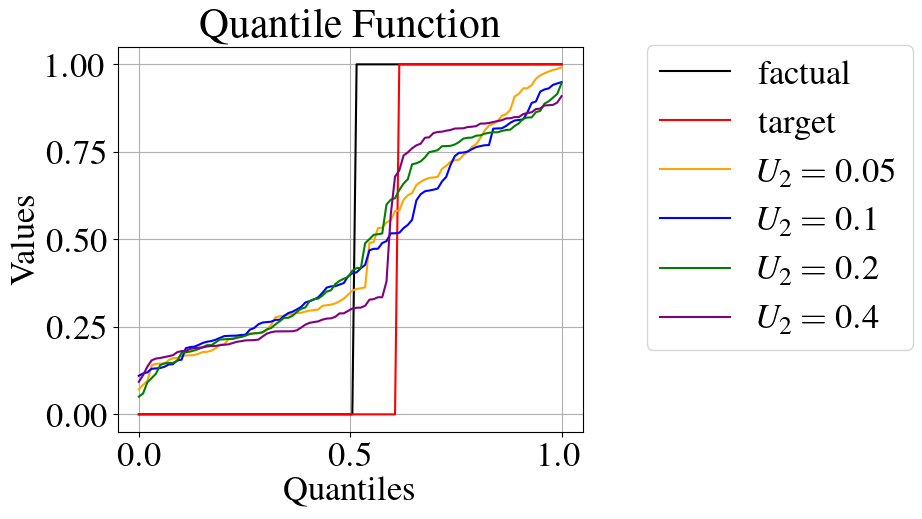

In [13]:
# Generate quantiles
quantiles = np.linspace(0, 1, 100)


y_factual = np.sort(np.array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.]))

y_target = np.sort(np.array([0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0.]))

y_mlp_005 = np.sort(counterfactual_mlp_005['cardio'].values)
y_mlp_010 = np.sort(counterfactual_mlp_010['cardio'].values)
y_mlp_020 = np.sort(counterfactual_mlp_020['cardio'].values)
y_mlp_040 = np.sort(counterfactual_mlp_040['cardio'].values)

# Plotting
plt.figure(figsize=(6, 5))
plt.plot(quantiles, y_factual, label='factual', color='black')
plt.plot(quantiles, y_target, label='target', color='red')
plt.plot(quantiles, y_mlp_005, label='$U_2=0.05$', color='orange')
plt.plot(quantiles, y_mlp_010, label='$U_2=0.1$', color='blue')
plt.plot(quantiles, y_mlp_020, label='$U_2=0.2$', color='green')
plt.plot(quantiles, y_mlp_040, label='$U_2=0.4$', color='purple')

plt.title('Quantile Function')
plt.xlabel('Quantiles')
plt.ylabel('Values')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid(True)
plt.show()

DEBUG:matplotlib.texmanager:family: serif, font: Times, info: \usepackage{mathptmx}
DEBUG:matplotlib.texmanager:DejaVu Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: Computer Modern Sans Serif, info: \usepackage{type1ec}
DEBUG:matplotlib.texmanager:Apple Chancery font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Textile font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: \usepackage{chancery}
DEBUG:matplotlib.texmanager:DejaVu Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: monospace, font: Computer Modern Typewriter, info: \usepackage{type1ec}
DEBUG:matplotlib.dviread:Dvi: C:\Users\leiyo\.matplotlib\tex.cache\24\df\24df9d8c3aa6b018d294093be7efe57d.dvi
DEBUG:matplotl

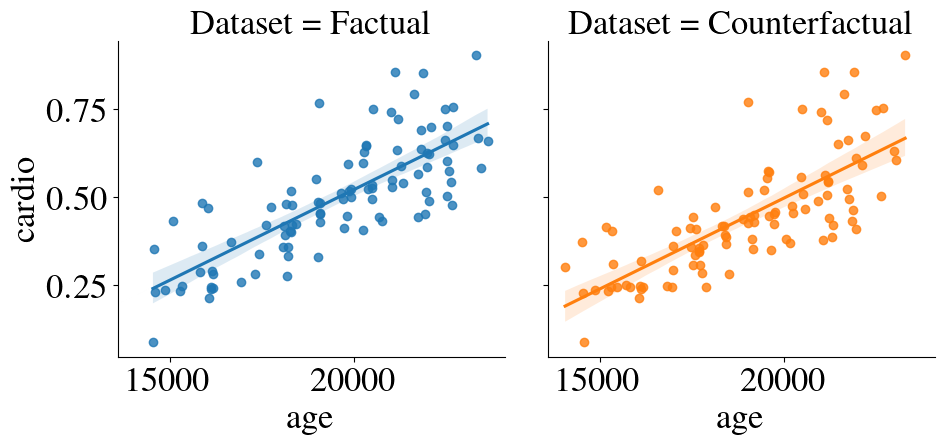

In [25]:
# Assuming factual and counterfactual are your DataFrames
# Add a new column to each DataFrame to label the data
factual['Dataset'] = 'Factual'
counterfactual['Dataset'] = 'Counterfactual'

# Concatenate the two DataFrames
combined_data = pd.concat([factual, counterfactual])

# Create the lmplot with facets
sns.lmplot(x='age', y='cardio', col='Dataset', hue='Dataset', data=combined_data, fit_reg=True)

# Show the plot
plt.show()

In [ ]:
with open(os.path.join(data_path, model_spec + 'explainer.pkl'), 'rb') as file:
    explainer = pickle.load(file)

In [37]:
col_names = []
col_scores = []
for column, col_index in zip(explainer.explain_columns, explainer.explain_indices):

    y_s = torch.FloatTensor(explainer.X[:, col_index])
    y_t = torch.FloatTensor(explainer.X_prime[:, col_index])
    wd_dist, _ = explainer.wd.distance(y_s, y_t, delta=0)

    col_names.append(column)
    col_scores.append(wd_dist.item())

pd.DataFrame({
    'Feature': col_names,
    'Score': col_scores,
}).sort_values(by='Score', ascending=False)

Feature     Score
6        smoke  0.065579
7         alco  0.052485
4  cholesterol  0.031147
0          age  0.018774
8       active  0.015883
5         gluc  0.006350
3       weight  0.004057
1       gender  0.002490
2       height  0.001179

DEBUG:matplotlib.texmanager:family: serif, font: Times, info: \usepackage{mathptmx}
DEBUG:matplotlib.texmanager:DejaVu Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: Computer Modern Sans Serif, info: \usepackage{type1ec}
DEBUG:matplotlib.texmanager:Apple Chancery font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Textile font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: \usepackage{chancery}
DEBUG:matplotlib.texmanager:DejaVu Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:Bitstream Vera Sans Mono font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: monospace, font: Computer Modern Typewriter, info: \usepackage{type1ec}
DEBUG:matplotlib.dviread:Dvi: C:\Users\leiyo\.matplotlib\tex.cache\24\df\24df9d8c3aa6b018d294093be7efe57d.dvi
DEBUG:matplotl

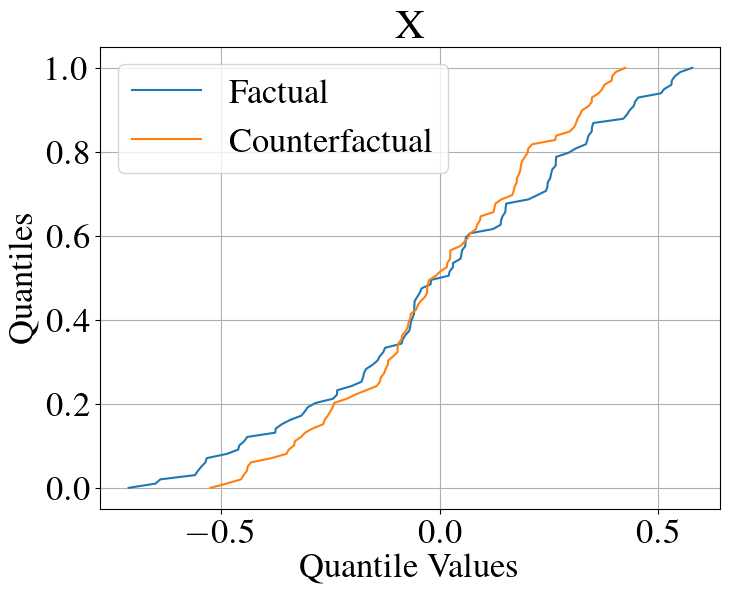

In [18]:
fa = torch.zeros_like(explainer.X_prime[:, explainer.explain_indices] @ explainer.swd.thetas[0])
dfa = torch.zeros_like(explainer.X_prime[:, explainer.explain_indices] @ explainer.swd.thetas[0])
for theta in explainer.swd.thetas:

    fa += explainer.X_prime[:, explainer.explain_indices] @ theta
    dfa += explainer.best_X[:, explainer.explain_indices] @ theta
    
fa /= len(explainer.swd.thetas)
dfa /= len(explainer.swd.thetas)

plot_quantile(factual=pd.DataFrame({'X': fa}), counterfactual=pd.DataFrame({'X': dfa}), column_name='X')

In [9]:
row_num  = 20

# Interleave rows
combined = pd.concat([factual.head(row_num), counterfactual.head(row_num)]).sort_index(kind='merge')

# Define formatters for specific columns
formatters = {
    "cardio": lambda x: f"{x:.4f}",
    "weight": lambda x: f"{x:.1f}"
}


# Convert to LaTeX
latex_code = combined.to_latex(index=False, formatters=formatters, 
                               caption="[\\textit{{German-Credit}}] Data points of factual and counterfactual distributions.", label="tab:german-credit")

print(latex_code)

\begin{table}
\caption{[\textit{{German-Credit}}] Data points of factual and counterfactual distributions.}
\label{tab:german-credit}
\begin{tabular}{rrrrrrrrrrrr}
\toprule
age & gender & height & weight & ap_hi & ap_lo & cholesterol & gluc & smoke & alco & active & cardio \\
\midrule
21270 & 1 & 164 & 82.0 & 130 & 90 & 1 & 1 & 0 & 0 & 1 & 0.7133 \\
20228 & 1 & 164 & 80.9 & 130 & 90 & 1 & 1 & 0 & 0 & 1 & 0.5805 \\
18275 & 1 & 157 & 86.0 & 100 & 60 & 1 & 1 & 0 & 0 & 1 & 0.0417 \\
18294 & 1 & 157 & 85.9 & 100 & 60 & 1 & 1 & 0 & 0 & 1 & 0.0422 \\
14636 & 2 & 177 & 103.0 & 135 & 80 & 3 & 1 & 0 & 0 & 1 & 0.8216 \\
14349 & 2 & 177 & 100.5 & 135 & 80 & 3 & 1 & 0 & 0 & 1 & 0.7667 \\
16142 & 2 & 177 & 90.0 & 150 & 90 & 1 & 1 & 0 & 0 & 1 & 0.8121 \\
15630 & 2 & 178 & 88.3 & 150 & 90 & 1 & 1 & 0 & 0 & 1 & 0.7321 \\
19522 & 1 & 154 & 75.0 & 130 & 79 & 1 & 1 & 0 & 0 & 1 & 0.5158 \\
18557 & 1 & 154 & 73.6 & 130 & 79 & 1 & 1 & 0 & 0 & 1 & 0.3750 \\
23215 & 1 & 164 & 78.0 & 120 & 80 & 1 & 1 & 0 & 0 & 